# Root Finding and Polynomial Interpolation

#### Allison Culbert, Astronomy 16, Spring 2019, Assignment 1

---
## Introduction

This project uses several different methods to find the roots of functions and approximate the values of functions at certain points. The root finding techniques include bisection and the Newton-Raphson method. Values of functions are approximated using an interpolation technique, specifically Neville's Algorithm. These methods are valuable for analyzing the behaivor of complex functions, and their implementation is very powerful in data analysis.

This project report is written as annotations of the code that is the implements the techniques described. There is no data set being interpreted, instead this project looks at how these methods interpret different function's behavior.

---

>To begin, libraries are imported and variable values are set that will be essential to performing the root finding and interpolation tecniques.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

# Setting constants to use in equation
Q = 2.7*(10**-10)
L = 4.4*(10**30)
Tp = 10**9
Tg = 10**7
c = 2.99*(10**10)
UPC = 1
error = 10**(-7)

## Part A: Root Finding
For the first part of this project, the goal was to approximate the location of the root of the energy balance equation for the electron plasma. That function and its derivative are defined here. Notice the use of the variables defined above.

In [2]:
# Energy balance equation for the electron plasma
# parameters: an integer temperature of electrons
# returns: an integer
def f(x):
    y = ((Q*UPC)*(x-Tg))-((L/(c**3))*((Tp/x)-1)*(1/(x**(1/2))))
    return y

# Derivative of f(x)
# parameters: an integer
# returns: an integer
def fprime(x):
    return ((Q*UPC)+((3/2)*(L/c**3)*Tp*(x**(-5/2)))-(L/(2*(c**3)*(x**3/2))))

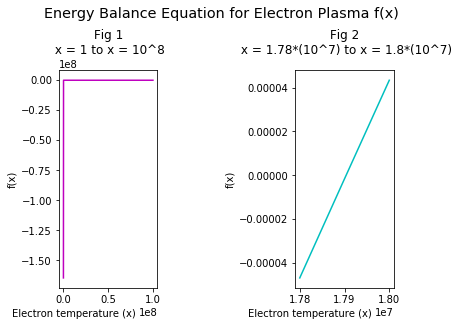

In [3]:
# Visualization of larger scale of the graph
plt.subplot(1, 3, 1)
xvals = np.arange(1, 10**8, 10)
plt.title("Fig 1\n x = 1 to x = 10^8", position= [0.5, 1.05])
plt.xlabel("Electron temperature (x)", position= [0.15, 0])
plt.ylabel("f(x)")
plt.plot(xvals, f(xvals), c="m")

# "Zoomed in" image of the root
plt.subplot(1, 3, 3)
zvals = np.arange(1.78*(10**7), 1.8*(10**7), 10)
plt.title("Fig 2\n x = 1.78*(10^7) to x = 1.8*(10^7)", position= [0.5, 1.05])
plt.xlabel("Electron temperature (x)", position= [0.15, 0])
plt.ylabel("f(x)")
plt.plot(zvals, f(zvals), c="c")

plt.suptitle("Energy Balance Equation for Electron Plasma f(x)", position= [0.5, 1.1], fontsize = "x-large")
plt.show()

Both methods used to approximate the root require initial guesses of the location of the root. Thus, the function is graphed so that these guesses can be made from a visual. Here, due to the shape of the function, it is hard to tell from the first graph. The second graph shows a more precise location of the root by "zooming" in on the graph.

Then the bisect function and Newton-Raphson function are written to approximate the roots of the function.

The ***bisection method*** requires two inputs, one positive and one negative, that bracket the location of the root. The function determines the value of the function of the midpoint between the two points. If the midpoint is positive, it replaces the positive point; if it is negative, it replaces the negative point. Then, the midpoint is found between those two points. Theoretically, the process repeats until the root is found. In this code, the process repeats until a point is found within the determined error range. 

The ***Newton-Raphson method*** takes a point and calculates a line that passes through the point and has the slope of the function at that point (this is done using the value of the function at x and the value of the function's derivative at x). Then, the point at which that line passes through the x axis is used as the new x value for the new point, and the process repeats again until the value of the function is within the error range. 

For both methods, the approximate x value of the root is reported. 

In [4]:
# Bisect function
# parameters: two integers (bisection interval), a function, an error integer
# returns: aproximate location of root integer
def bisect(x1, x2, func, acc):
    if (x1 == x2):
        throw("Bad initial range")
    root = None
    f1=func(x1)
    f2=func(x2)
    count = 0
    while abs(f1) > acc and abs(f2) > acc:
        count+=1
        x3 = x1 + 0.5*(x2-x1)
        f3 = func(x3)
        if f3 == 0:
            root = x3
            return root
        if f1*f3 < 0.0:
            f2 = f3
            x2 = x3
        else:
            f1 = f3
            x1 = x3
    if abs(f1) < acc:
        root = x1
    else:
        root = x2
    print("Root located at x = " + str(root) + ", found by bisection")
    print("Number of iterations: " + str(count))

In [5]:
# Newton-Raphson function
# parameters: integer root guess, an error integer, a function, the function's derivative
# returns: approximate location of root integer
def newt_raph(x, acc, func, funcprime):
    count = 0
    while abs(func(x)) > acc:
        count += 1
        xnew = (x-((func(x))/(funcprime(x))))
        x = xnew
    print("Root at x = " + str(x)+ ", found by the Newton-Raphson method \nNumber of iterations: " + str(count))

>Here the function is run using values from Figure 2. 

In [6]:
bisect(1.79*(10**7), 1.795*(10**7), f, error)
newt_raph(1.8*(10**7), error, f, fprime)

Root located at x = 17903515.625, found by bisection
Number of iterations: 7
Root at x = 17903506.60807151, found by the Newton-Raphson method 
Number of iterations: 1


>Here, the photon and proton temperatures as well as the ratio U/(pc^2) are changed and the process is repeated.  The following code uses the ranges specified on the assignment sheet. The difference in the approximate locations of the roots between these results and the previous results demonstrate how the constants change the behavior of the function.

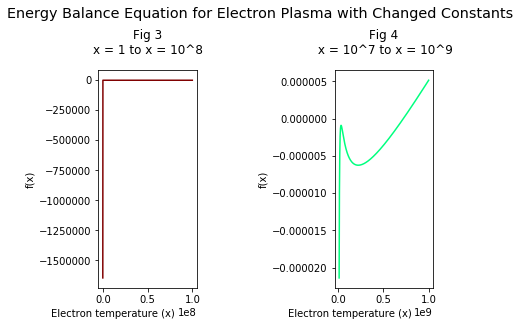

Root located at x = 721562500.0, found by bisection
Number of iterations: 5
Root at x = 721468021.9926018, found by the Newton-Raphson method 
Number of iterations: 3


In [7]:
# Change of variabes
Tp =  10**7
Tg = 10**9
UPC = 8*(10**(-5))

# Larger scale plot
plt.subplot(1, 3, 1)
xvals = np.arange(1, 10**8, 10)
plt.title("Fig 3\nx = 1 to x = 10^8", position= [0.5, 1.05])
plt.xlabel("Electron temperature (x)", position= [0.15, 0])
plt.ylabel("f(x)")
plt.plot(xvals, f(xvals), c="maroon")

# Smaller scale plot
plt.subplot(1, 3, 3)
zvals = np.arange((10**7), (10**9), 10)
plt.title("Fig 4\n x = 10^7 to x = 10^9", position= [0.5, 1.05])
plt.xlabel("Electron temperature (x)", position= [0.15, 0])
plt.ylabel("f(x)")
plt.plot(zvals, f(zvals), c ="springgreen")

plt.suptitle("Energy Balance Equation for Electron Plasma with Changed Constants", position= [0.5, 1.1], fontsize="x-large")
plt.show()

# Root approximation techniques
bisect(10**7, 10**9, f, error)
newt_raph(10**9, error, f, fprime)

___
## Part B: Polynomial Interpolation
Polynomial interpolation is the process by which values of a function are estimated between a set of points. In this project, Neville's algorithm was used to estimate the values of a function y(x) where x = 5 and x = -5. 

In [8]:
# y(x)
# parameters: one integer x value
# returns: an integer y value
def y(x):
    return (3+(200*x)-(30*(x**2))+(4*(x**3))-(x**4))

>First, the function is plotted and its roots are found using bisection

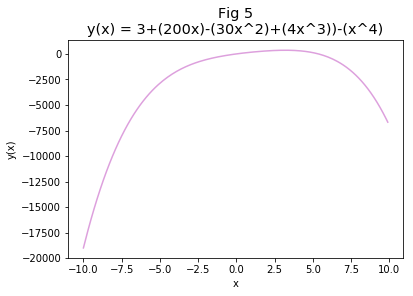

In [9]:
xvals = np.arange(-10, 10, 0.1)
plt.plot(xvals, y(xvals), c="plum")
plt.title("Fig 5\ny(x) = 3+(200x)-(30x^2)+(4x^3))-(x^4)", size = "x-large")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.show()

In [10]:
bisect(-1, 1, y, 1/(10**7))
bisect(4, 6, y, 1/(10**7))

Root located at x = -0.014966334216296673, found by bisection
Number of iterations: 31
Root located at x = 5.369349683634937, found by bisection
Number of iterations: 31


***Neville's Algorithm*** is a method of polynomial interpolation that creates a polynomial that passes through a given set of points. The degree of the polynomial depends on the number of points given.

The general structure of the algorithm is ${\displaystyle p_{i,j}(x)={\frac {(x-x_{j})p_{i,j-1}(x)-(x-x_{i})p_{i+1,j}(x)}{x_{i}-x_{j}}},\,} {\displaystyle 0\leq i<j\leq n.\,} 0\leq i<j\leq n.\,$ 

In this method, the polynomials of degrees quadratic or higher require the value of the polynomial of lesser degrees. Since this project required linear, quadratic, and cubic polynomials of the same form, three functions were written. The nevCubic calls the nevQuad function to obtain the value of *p1,2,3* and *p2,3,4*, just as newQuad calls nevLin to obtain the values of *p1,2* and *p2,3*. *p1,1* and *p2,2* are just the values of the function at the given points.

In [11]:
def nevLin(func, x, x1, x2):
    a = (x-x2)*func(x1)
    b = (x1-x)*func(x2)
    c = x1-x2
    return ((a+b)/c)

def nevQuad(func, x, x1, x2, x3):
    a = (x-x3)*(nevLin(func, x, x1, x2))
    b = (x1-x)*(nevLin(func, x, x2, x3))
    c = (x1-x3)
    return ((a+b)/c)

def nevCube(func, x, x1, x2, x3, x4):
    a = (x-x4)*(nevQuad(func, x, x1, x2, x3))
    b = (x1-x)*(nevQuad(func, x, x2, x3, x4))
    c = (x1-x4)
    return ((a+b)/c)

def err(a, b):
    y = round(abs((((a-b)/a))*100),2)
    return str(y)

In [12]:
print("Value of y(-5): " + str(y(-5)))
print("Value of y(5): " + str(y(5)))

print("Interpolated value of y(-5) using linear polynomial: " +str(nevLin(y, -5, -6, -4)))
print("error: " + err(y(-5), nevLin(y, -5, -6, -4)) + "%")

print("Interpolated value of y(5) using linear polynomial: " +str(nevLin(y, 5, 4, 6)))
print("error: " + err(y(5), nevLin(y, 5, 4, 6)) + "%")

print("Interpolated value of y(-5) using quadratic polynomial: " +str(nevQuad(y, -5, -6, -4, -3)))
print("error: " + err(y(-5), nevQuad(y, -5, -6, -4, -3))+"%")

print("Interpolated value of y(5) using quadratic polynomial: " +str(nevQuad(y, 5, 4, 6, 7)))
print("error: " + err(y(5), nevQuad(y, 5, 4, 6, 7)) + "%")

print("Interpolated value of y(-5) using cubic polynomial: " +str(nevCube(y, -5, -7, -6, -4, -3)))
print("error: " +err(y(-5), nevCube(y, -5, -7, -6, -4, -3)) + "%")

print("Interpolated value of y(5) using cubic polynomial: " +str(nevCube(y, 5, 3, 4, 6, 7)))
print("error: " +err(y(5), nevCube(y, 5, 3, 4, 6, 7))+ "%")


Value of y(-5): -2872
Value of y(5): 128
Interpolated value of y(-5) using linear polynomial: -3113.0
error: 8.39%
Interpolated value of y(5) using linear polynomial: 7.0
error: 94.53%
Interpolated value of y(-5) using quadratic polynomial: -2916.0
error: 1.53%
Interpolated value of y(5) using quadratic polynomial: 164.0
error: 28.12%
Interpolated value of y(-5) using cubic polynomial: -2868.0
error: 0.14%
Interpolated value of y(5) using cubic polynomial: 132.0
error: 3.12%


|Degree Polynomial| x = -5 |x<sub>1</sub>|x<sub>2</sub>|x<sub>3</sub>|x<sub>4</sub>|error||Degree Polynomial| x = 5 |x<sub>1</sub>|x<sub>2</sub>|x<sub>3</sub>|x<sub>4</sub>|error|
|------|-------|--------|-------|--------||-------|--------||------|-------|--------|-------|--------||-------|--------|
|Linear|-3113.0|-6|-4|-|-|8.39%||Linear|7.0|4|6|-|-|94.53%|
|Quadratic|-2916.0|-6|-4|-3|-|1.53%||Quadratic|164.0|4|6|7|-|28.12%|
|Cubic|-2868.0|-7|-6|-4|-3|0.14%||Cubic|132.0|3|4|6|7|3.12%|


In figure five it seems that the slope of the function has a higher magnitude at x = -5 than at x = 5. This was confirmed using Wolfram Alpha (f'(5) = -300, f'(-5) = 1300). This implies that the sharper the slope, the better Neville's Algorithm is at predicting the value of the function at that point. However, in order to prove this, other points would need to be tested. What we can conclude is that Neville's algorithm performs better with higher magnitude polynomials, and that its accuracy changes depending on what point is chosen.

## Bonus

In [13]:
# Bonus code was written by Elliot Pavlovich

def cubic_spline(point, x, y):
    len_minus_2 = len(x) - 2
    len_minus_4 = len(x) - 4
    coeff_matrix = np.zeros((len_minus_2, len_minus_2))
    answers = np.zeros(len_minus_2)
    y_double_prime = np.zeros(len(y))
    len_minus_1 = len(x) - 1
    len_minus_3 = len(x) - 3
    len_minus_5 = len(x) - 5
    
    # start with j = 2 (meaning index = 1)
    coeff_matrix[0,0] = (x[2]-x[0])/3
    coeff_matrix[0,1] = (x[2]-x[1])/6
    answers[0] = (y[2]-y[1])/(x[2]-x[1]) - (y[1]-y[0])/(x[1]-x[0])
                            
    for i in range(len_minus_4):
        j = i + 2 # now loop from j = 3 to N-2
        coeff_matrix[i+1,i] = (x[j]-x[j-1])/6
        coeff_matrix[i+1,i+1] = (x[j+1]-x[j-1])/3
        coeff_matrix[i+1,i+2] = (x[j+1]-x[j])/6
        answers[i+1] = (y[j+1]-y[j])/(x[j+1]-x[j]) - (y[j]-y[j-1])/(x[j]-x[j-1])
        
    # N-1 line
    coeff_matrix[len_minus_3,len_minus_4] = (x[len_minus_4]-x[len_minus_3])/6
    coeff_matrix[len_minus_3,len_minus_3] = (x[len_minus_3]-x[len_minus_5])/3
    answers[len_minus_3] = (y[len_minus_3]-y[len_minus_4])/(x[len_minus_3]-x[len_minus_4]) - (y[len_minus_4]-y[len_minus_5])/(x[len_minus_4]-x[len_minus_5])
    
    det_coeff = np.linalg.det(coeff_matrix)
    
    for i in range (len_minus_2):
        cramer_matrix = coeff_matrix
        for j in range(len_minus_2):
            cramer_matrix[j,i] = answers[j]
        
        det_cramer_matrix = np.linalg.det(cramer_matrix)
        y_double_prime[i+1] = det_cramer_matrix/det_coeff
     
    splined_y_array = np.zeros(len(y)-1)
    y_array_length = len(y) - 1
    
    for j in range(y_array_length):
        a_val = (x[j+1] - point)/(x[j+1]-x[j])
        b_val = (point - x[j])/(x[j+1]-x[j])
        c_val = ((a_val**3 - a_val)*((x[j+1]-x[j])**2))/6
        d_val = ((b_val**3 - b_val)*((x[j+1]-x[j])**2))/6
        splined_y_array[j] = a_val*y[j] + b_val*y[j+1] + c_val*y_double_prime[j] +d_val*y_double_prime[j+1] 
               
    for k in range(len(x)):
        if x[k] < point:
            index = k    
                 
    return(splined_y_array[index])

In [14]:
print(cubic_spline(12, [11, 11.5, 12.5, 13], [y(11), y(11.5), y(12.5), y(13)]))
print(nevCube(y, 12, 11, 11.5, 12.5, 13))
print(err(y(12), cubic_spline(12, [11, 11.5, 12.5, 13], [y(11), y(11.5), y(12.5), y(13)])))
print(err(y(12), nevCube(y, 12, 11, 11.5, 12.5, 13)))

-15836.411764705872
-15740.75
0.61
0.0


|Interpolation Method| x = 12|x<sub>1</sub>|x<sub>2</sub>|x<sub>3</sub>|x<sub>4</sub>|error|
|---------|------|-------|--------|-------|--------|-------|
|Cubic Spline|-15836.412|11|11.5|12.5|13|0.61%|
|Neville's Allgorithm|-15740.75|11|11.5|12.5|13|0.0%|

This implementation of Neville's Algorithm is more accurate than this implementation of the cubic spline. However they are both extremely accurate.